# Linear Regression

Linear regression tries to predict an output based on linear transformations of a given input data point (much like a weighted sum).

The general equation looks something like this:

$y = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \cdots + + \theta_{n}x_{n}$

In the above equation, **y** is the predicted output and the **x's** are the input feature values. The parameters of linear regression are the $\theta s$ that determine the best fit line for the given data set.

Lets start off by first defining a cost function. The cost function is a measure of how good the model is at predicting the output. Essentially, the cost function gives us a metric to improve our model upon. Two very common cost functions for regression type problems include Root Mean Squared Error (RMSE) and Mean Squared Error (MSE). Lets focus on MSE for now since its a bit easier to work with. Solving a linear regression problem is really about finding the $\theta s$ that minimize the cost function.


Lets take a quick look at 2 different ways of manually solving linear regression and compare them against SciKit Learn's version of Linear Regression:

- **Closed Form Approach** (directly solve for $\theta s$ through an equation)
- **Gradient Decent Approach** (iteratively minimize a cost function to arrive at $\theta s$)

<br>
### ***Closed Form Approach***


The above general equation for linear regression can be expressed in a much more compact format using the dot product:

$y = \theta^{T} \cdot X$

In the above equation X is a vector containing the current instances feature values, and $\theta$ is a column vector containing $\theta_{0}, \theta_{1} \cdots \theta_{n}$ (where $\theta_{0}$ is a bias). Therefore $\theta^{T}$ becomes a row vector. 


Now that we have a more compact way to express the standard linear regression, lets solve for the optimal $\theta s$ using the Normal Equation:

$\theta = (X^T \cdot X)^{-1} \cdot X^T \cdot y$

In the above equation $\theta$ is a vector of optimal parameter values, X is the feature matrix, and y is a vector containing all the predicted outputs that correspond to X.

<br>

Let's try and solve for theta using some arbitrary and random linear data taken from the ideal equation:

$y = 5x + 10$ where the slope is 5 and the bias is 10

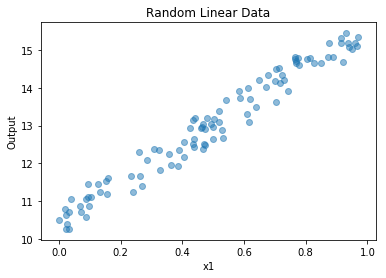

In [88]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

slope = 5
bias = 10

X = np.random.rand(100, 1)
y = bias + slope*X + np.random.rand(100,1)

fig = plt.figure()

ax = fig.add_subplot(111)
ax.set_title('Random Linear Data')
ax.set_xlabel('x1')
ax.set_ylabel('Output')
ax.scatter(X, y, alpha=0.5);

In [89]:
# add in a column of 1's for theta0
new_X = np.hstack((np.ones((100,1)),X))

# solve for optimal thetas
optimal_thetas = np.linalg.inv(new_X.T.dot(new_X)).dot(new_X.T).dot(y)

# print results
for i, theta in enumerate(optimal_thetas):
    print("Theta{}: {}".format(i, theta))



Theta0: [10.49211844]
Theta1: [5.09815549]


Text(0,0.5,'Output')

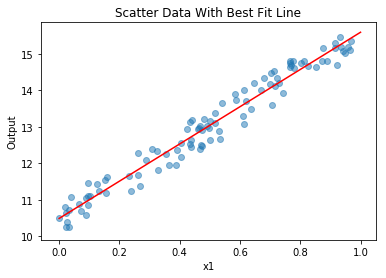

In [90]:
fig = plt.figure()
ax = plt.axes()

x_data = np.linspace(0, 1, 100)
ax.plot(x_data, optimal_thetas[0] + optimal_thetas[1]*x_data, color='red');
ax.scatter(X, y, alpha=0.5);
ax.set_title('Scatter Data With Best Fit Line')
ax.set_xlabel('x1')
ax.set_ylabel('Output')

As we can see, the Normal equation actually came pretty close to the expected values! **The approximated bias is 10.49 and the approximated slope is 5.10** whereas the exact values were 10 and 5 accordingly. The values we found for $\theta$ are obviously not perfect since we introduced a bit of random noise back when we created our artificial data. 

<br>

### ***SciKit Learn Approach***

In [91]:
from sklearn.linear_model import LinearRegression

# instantiate LinearRegression object and fit to data
sci_kit_model = LinearRegression()
sci_kit_model.fit(X, y);

# print results
print("Theta0: {}".format(sci_kit_model.intercept_))
print("Theta1: {}".format(sci_kit_model.coef_))

Theta0: [10.49211844]
Theta1: [[5.09815549]]


As we can see, the optimal $\theta s$ that we got through the Normal equation exactly match the learned parameters from SKLearn's Linear Regression!

<br>

### ***Gradient Descent Approach***

In [104]:
# set a couple of parameters
learn_rate = 0.01
num_iterations = 10000
m = 100
# random initialization of theta
grad_theta = np.random.randn(2,1)

for iteration in range(num_iterations):
    gradients = 2/m * new_X.T.dot(new_X.dot(grad_theta) - y)
    grad_theta = grad_theta - learn_rate * gradients
    
# print results
print("Theta0: {}".format(grad_theta[0]))
print("Theta1: {}".format(grad_theta[1]))

Theta0: [10.49211768]
Theta1: [5.09815693]


<br>

### *** Conclusion *** 

| SciKit Learn | Closed Form   | Gradient Descent |
|------|------||------|
|   (10.49, 5.10)  | (10.49, 5.10) | (10.49, 5.10)|

All 3 methods result in the same optimal thetas!